In [49]:
# Importing required libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [50]:
# Loading dataset for predicting Internet traffic.
data = pd.read_csv('Website Vistiors Daywise - Sheet1.csv')
data

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


## Exploratory Data Analysis

In [51]:
print('Shape of DataFrame ',data.shape,' \n Size of DataFrame', data.size)
print('\n \n--------*******************************************--------')
print('\n Duplicat Rows in DataFrame', data.duplicated().sum())#or use isnull
print('\n \n--------*******************************************--------')
print('\n Total No. of Missing Values', data.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n No. of Missing Values for each feature \n\n', data.isna().sum())
print('\n \n--------*******************************************--------')
print('\n ===Data Types of the DataSet=== \n\n', data.dtypes)#Identification of data types
print('\n \n--------*******************************************--------')

Shape of DataFrame  (173, 2)  
 Size of DataFrame 346

 
--------*******************************************--------

 Duplicat Rows in DataFrame 0

 
--------*******************************************--------

 Total No. of Missing Values 0

 
--------*******************************************--------

 No. of Missing Values for each feature 

 Date              0
Daily Visitors    0
dtype: int64

 
--------*******************************************--------

 ===Data Types of the DataSet=== 

 Date              object
Daily Visitors     int64
dtype: object

 
--------*******************************************--------


In [52]:
# Renaming Daily Visitors column name.
data.rename(columns = {'Daily Visitors':'Daily_Visitors'}, inplace = True)
data.columns

Index(['Date', 'Daily_Visitors'], dtype='object')

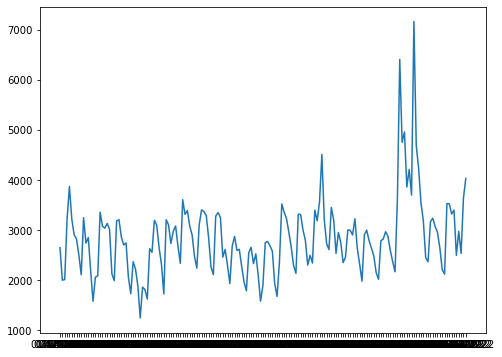

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['Date'], data['Daily_Visitors'])

In [54]:
data['month']=data.Date.dt.strftime('%b')
data

AttributeError: Can only use .dt accessor with datetimelike values

In [55]:
data.dtypes

Date              object
Daily_Visitors     int64
dtype: object

In [56]:
plt.figure(figsize=(12,3))
sns.lineplot(x='month',y='Daily_Visitors',data = data)

ValueError: Could not interpret value `month` for parameter `x`

<Figure size 864x216 with 0 Axes>

In [ ]:
sns.distplot(data.Daily_Visitors)

In [57]:
# Finding outliers
plt.figure(figsize = (8,6))
sns.boxplot(x = 'month', y = "Daily_Visitors", data = data)

ValueError: Could not interpret input 'month'

<Figure size 576x432 with 0 Axes>

We are not considering these values as outliers. Because due to offer sales more visitors search in the internet.

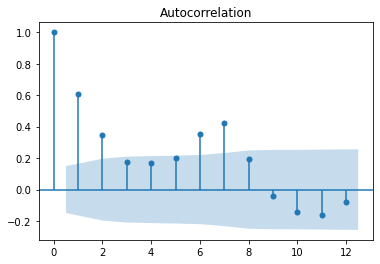

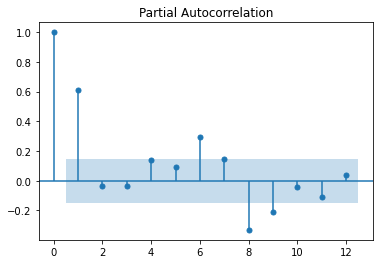

In [58]:
# Plotting ACF and PACF plot for (p,q) values.
tsa_plots.plot_acf(data.Daily_Visitors, lags = 12)
tsa_plots.plot_pacf(data.Daily_Visitors, lags = 12)
plt.show()

In [59]:
data1 = data.copy()
data1.shape

(173, 2)

<ipython-input-60-230871a11690>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(data1.Daily_Visitors,freq= 12)


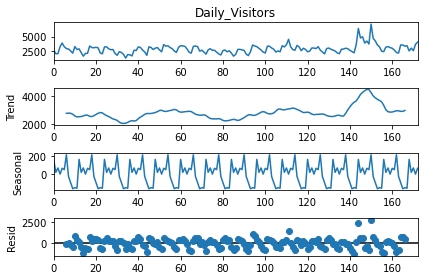

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data1.Daily_Visitors,freq= 12)
decompose_ts_add.plot()
plt.show()

In [61]:
data1["t"] = np.arange(1, 174)
data1["t_square"] = data1["t"]*data1["t"]
data1["log_visitors"] = np.log(data1["Daily_Visitors"])
data1 = pd.get_dummies(data1)
data1.rename(columns = {'month_Dec':'dec', 'month_Feb':'feb', 'month_Jan':'jan', 'month_Mar':'mar', 
                        'month_Nov':'nov', 'month_Oct':'oct'}, inplace = True)
data1

,Daily_Visitors,t,t_square,log_visitors,Date_01-01-2022,Date_01-02-2022,Date_01-03-2022,Date_01-10-2021,Date_01-11-2021,Date_01-12-2021,...,Date_29-10-2021,Date_29-11-2021,Date_29-12-2021,Date_30-01-2022,Date_30-10-2021,Date_30-11-2021,Date_30-12-2021,Date_31-01-2022,Date_31-10-2021,Date_31-12-2021
0,2649,1,1,7.881937,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2,4,7.600902,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,3,9,7.606387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3219,4,16,8.076826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3870,5,25,8.261010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2494,169,28561,7.821643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,2976,170,28900,7.998335,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,2534,171,29241,7.837554,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,3641,172,29584,8.200014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Checking for dummies created properly or not
col = ['dec', 'feb', 'jan', 'mar', 'nov', 'oct']
for i in col:
    print(i)
    print(data1[i].value_counts())

dec


KeyError: 'dec'

In [64]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Daily_Visitors):
    result = adfuller(Daily_Visitors)
    labels = ['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary ")

In [65]:
adfuller_test(data['Daily_Visitors'])

ADF Test Statistic : -2.3585866739043726
p-value : 0.15376766558874538
Lags Used : 14
Number of Observations Used : 158
weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary 


In [66]:
data1['visitors_First_Difference'] = data1['Daily_Visitors'] - data1['Daily_Visitors'].shift(1)
data1

,Daily_Visitors,t,t_square,log_visitors,Date_01-01-2022,Date_01-02-2022,Date_01-03-2022,Date_01-10-2021,Date_01-11-2021,Date_01-12-2021,...,Date_29-11-2021,Date_29-12-2021,Date_30-01-2022,Date_30-10-2021,Date_30-11-2021,Date_30-12-2021,Date_31-01-2022,Date_31-10-2021,Date_31-12-2021,visitors_First_Difference
0,2649,1,1,7.881937,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,2000,2,4,7.600902,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-649.0
2,2011,3,9,7.606387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
3,3219,4,16,8.076826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1208.0
4,3870,5,25,8.261010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2494,169,28561,7.821643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-905.0
169,2976,170,28900,7.998335,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,482.0
170,2534,171,29241,7.837554,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-442.0
171,3641,172,29584,8.200014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1107.0


In [67]:
data1.visitors_First_Difference.replace(np.NaN,data1.visitors_First_Difference.median(),inplace=True)
data1

,Daily_Visitors,t,t_square,log_visitors,Date_01-01-2022,Date_01-02-2022,Date_01-03-2022,Date_01-10-2021,Date_01-11-2021,Date_01-12-2021,...,Date_29-11-2021,Date_29-12-2021,Date_30-01-2022,Date_30-10-2021,Date_30-11-2021,Date_30-12-2021,Date_31-01-2022,Date_31-10-2021,Date_31-12-2021,visitors_First_Difference
0,2649,1,1,7.881937,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-132.0
1,2000,2,4,7.600902,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-649.0
2,2011,3,9,7.606387,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11.0
3,3219,4,16,8.076826,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1208.0
4,3870,5,25,8.261010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2494,169,28561,7.821643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-905.0
169,2976,170,28900,7.998335,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,482.0
170,2534,171,29241,7.837554,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-442.0
171,3641,172,29584,8.200014,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1107.0


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Columns: 178 entries, Daily_Visitors to visitors_First_Difference
dtypes: float64(2), int32(2), int64(1), uint8(173)
memory usage: 34.8 KB


In [69]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(visitors_First_Difference):
    result = adfuller(visitors_First_Difference)
    labels = ['ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, accept the null hypothesis. Data is non-stationary ")

In [70]:
adfuller_test(data1['visitors_First_Difference'])

ADF Test Statistic : -6.609893859176986
p-value : 6.416273945269642e-09
Lags Used : 12
Number of Observations Used : 160
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


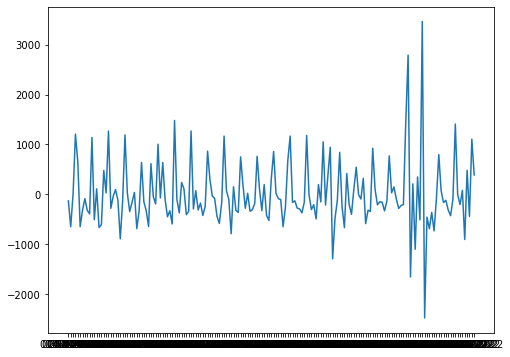

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data['Date'], data1['visitors_First_Difference'])

In [ ]:
data1.to_csv('P:/Project/internet traffic prediction/cleaned_data.csv')

## Splitting Data

In [72]:
train = data1.head(112)
test = data1.tail(61)

## Model Building for Model Based Forcasting Methods

In [27]:
# Linear
import statsmodels.formula.api as smf 
model_linear = smf.ols('Daily_Visitors~t', data = train).fit()
preds_linear = pd.Series(model_linear.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_linear))**2))
rmse_linear

992.0658017458296

<AxesSubplot:title={'center':'Linear'}>

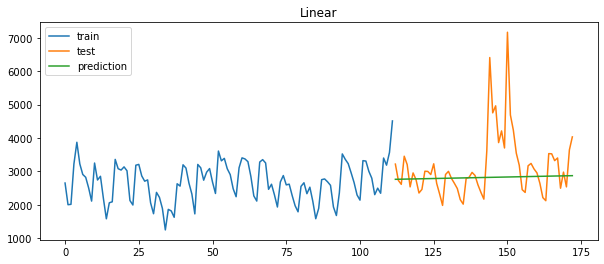

In [28]:
plt.title('Linear')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_linear.plot(legend = True, label = 'prediction')

In [29]:
# Exponential
model_exp = smf.ols('log_visitors~t',data = train).fit()
preds_exp = pd.Series(model_exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_exp)))**2))
rmse_exp

1013.569102849545

<AxesSubplot:title={'center':'Exponential'}>

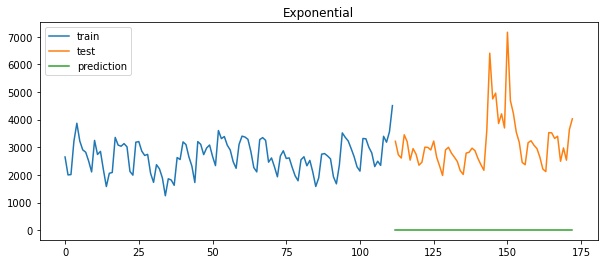

In [30]:
plt.title('Exponential')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_exp.plot(legend = True, label = 'prediction')

In [31]:
# Quadratic
model_quad = smf.ols('Daily_Visitors~t+t_square',data = train).fit()
preds_quad = pd.Series(model_quad.predict(test[["t","t_square"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_quad))**2))
rmse_quad

964.8062546139681

<AxesSubplot:title={'center':'Quadratic'}>

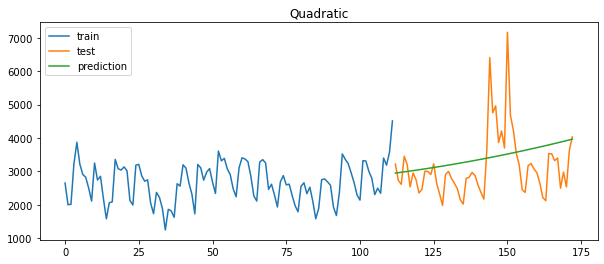

In [32]:
plt.title('Quadratic')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_quad.plot(legend = True, label = 'prediction')

In [33]:
# Additive seasonality
model_as = smf.ols('Daily_Visitors~jan+feb+mar+oct+nov+dec', data = train).fit()
preds_as = pd.Series(model_as.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_as))**2))
rmse_add_sea

PatsyError: Error evaluating factor: NameError: name 'nov' is not defined
    Daily_Visitors~jan+feb+mar+oct+nov+dec
                                   ^^^

NameError: name 'preds_as' is not defined

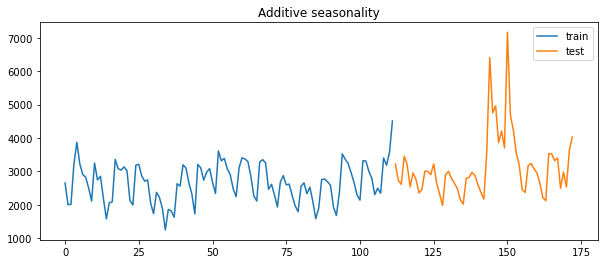

In [34]:
plt.title('Additive seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_as.plot(legend = True, label = 'prediction')

In [35]:
# Additive seasonality Quadratic
model_asq = smf.ols('Daily_Visitors~jan+feb+mar+oct+nov+dec+t+t_square', data = train).fit()
preds_asq = pd.Series(model_asq.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds_asq))**2))
rmse_add_sea_quad

PatsyError: Error evaluating factor: NameError: name 'nov' is not defined
    Daily_Visitors~jan+feb+mar+oct+nov+dec+t+t_square
                                   ^^^

NameError: name 'preds_asq' is not defined

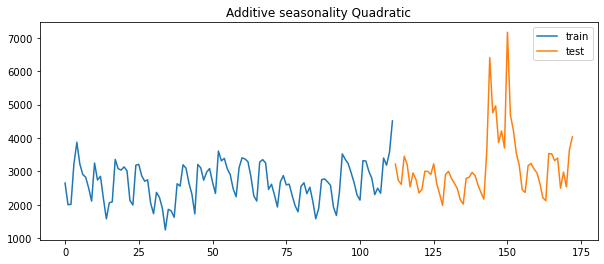

In [36]:
plt.title('Additive seasonality Quadratic')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_asq.plot(legend = True, label = 'prediction')

In [37]:
# Multiplicative seasonality
model_ms = smf.ols('log_visitors~jan+feb+mar+oct+nov+dec', data = train).fit()
preds_ms = pd.Series(model_ms.predict(test[['jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_multi_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_ms)))**2))
rmse_multi_sea

PatsyError: Error evaluating factor: NameError: name 'nov' is not defined
    log_visitors~jan+feb+mar+oct+nov+dec
                                 ^^^

NameError: name 'preds_ms' is not defined

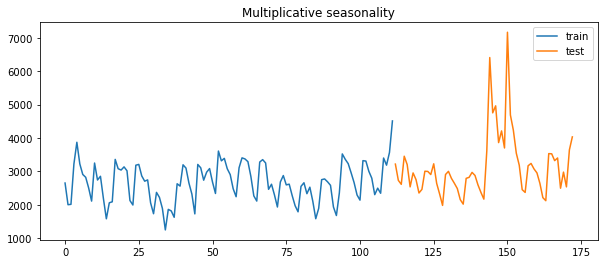

In [38]:
plt.title('Multiplicative seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_ms.plot(legend = True, label = 'prediction')

In [39]:
# Multiplicative Additive seasonality
model_mas = smf.ols('log_visitors~jan+feb+mar+oct+nov+dec+t', data = train).fit()
preds_mas = pd.Series(model_mas.predict(test[['t', 'jan', 'feb', 'mar', 'oct', 'nov', 'dec']]))
rmse_multi_add_sea = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(np.exp(preds_mas)))**2))
rmse_multi_add_sea

PatsyError: Error evaluating factor: NameError: name 'nov' is not defined
    log_visitors~jan+feb+mar+oct+nov+dec+t
                                 ^^^

NameError: name 'preds_mas' is not defined

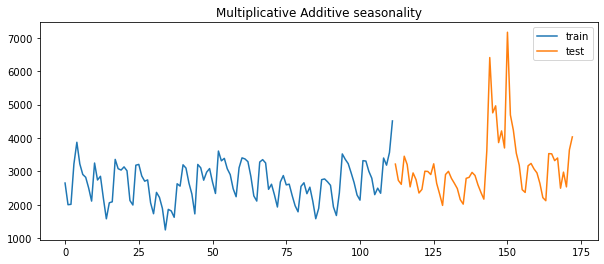

In [40]:
plt.title('Multiplicative Additive seasonality')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_mas.plot(legend = True, label = 'prediction')

In [41]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Daily_Visitors'],order=(7,0,5))
model_fit=model.fit()
preds = model_fit.predict(start = test.index[0],end = test.index[-1])
rmse_preds_arma = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds))**2))
rmse_preds_arma

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available


924.919654754283

<AxesSubplot:title={'center':'ARMA'}>

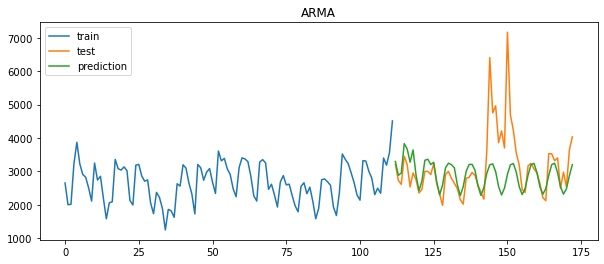

In [42]:
plt.title('ARMA')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds.plot(legend = True, label = 'prediction')

In [73]:
model=ARIMA(train['visitors_First_Difference'],order=(7,1,5))
model_fit=model.fit()
preds = model_fit.predict(start = test.index[0],end = test.index[-1])
rmse_preds_arima = np.sqrt(np.mean((np.array(test['visitors_First_Difference'])-np.array(preds))**2))
rmse_preds_arima

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

860.0228294760228

<AxesSubplot:title={'center':'ARIMA'}>

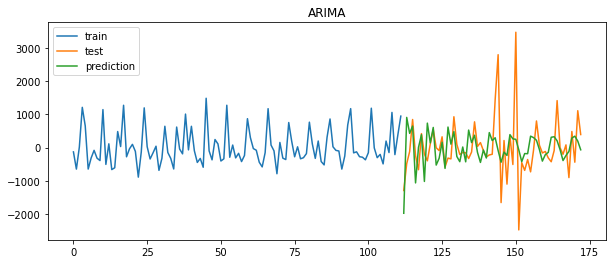

In [74]:
plt.title('ARIMA')
train['visitors_First_Difference'].plot(legend = True, label = 'train', figsize = (10,4))
test['visitors_First_Difference'].plot(legend = True, label = 'test')
preds.plot(legend = True, label = 'prediction')

In [75]:
import itertools
p = range(0, 8)
d = range(0, 5)
q = range(0, 8)
pdq_combinations = pd.Series(itertools.product(p,d,q)).tolist()
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 2, 7),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 3, 7),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 4, 6),
 (1, 4, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2,

In [76]:
rmse = []
order1 = []

In [77]:
for pdq in pdq_combinations:
    try:
        model = ARIMA(train['Daily_Visitors'], order = pdq).fit()
        preds = model.predict(start = len(train), end = (len(data1)-1))
        error = np.sqrt(mean_squared_error(test['Daily_Visitors'],preds))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:726: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (maco

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Futur

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mo

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\shashank

In [78]:
result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])


In [ ]:
# SARIMAX
import statsmodels.api as sm
sar_model = sm.tsa.statespace.SARIMAX(train['Daily_Visitors'],order = (1, 1, 1),seasonal_order = (1,1,1,2))
results=model.fit()
sar_preds = results.predict(start = test.index[0],end = test.index[-1])
sar_rmse = np.sqrt(np.mean((np.array(test['Daily_Visitors'])-np.array(preds))**2))
sar_rmse

In [ ]:
plt.title('SARIMAX')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
sar_preds.plot(legend = True, label = 'prediction')

## Model Building for Data Driven Forecasting Methods

In [79]:
def RMSE(org, preds):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(preds))**2))
    return rmse

In [291]:
# Holt method
from statsmodels.tsa.holtwinters import Holt
model_h = Holt(train["Daily_Visitors"]).fit()
preds_h = model_h.predict(start = test.index[0],end = test.index[-1])
rmse_holt = RMSE(test.Daily_Visitors, preds_h)
rmse_holt

6351.545010736264

<AxesSubplot:title={'center':'Holt method'}>

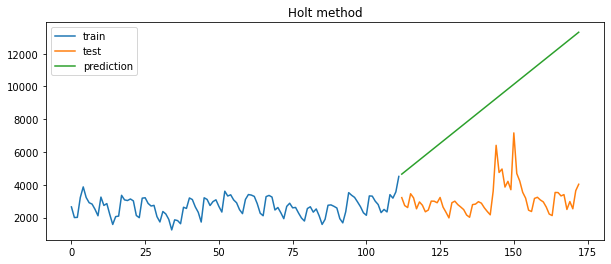

In [332]:
plt.title('Holt method')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_h.plot(legend = True, label = 'prediction')

In [292]:
# Holts winter exponential smoothing with additive seasonality and additive trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hwe_as_at = ExponentialSmoothing(train["Daily_Visitors"],seasonal = "add",trend = "add",seasonal_periods = 12).fit()
preds_hwe_as_at = model_hwe_as_at.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_add_sea_add_trend = RMSE(test.Daily_Visitors, preds_hwe_as_at)
rmse_hwe_add_sea_add_trend

1138.8138889807942

<AxesSubplot:title={'center':'Holts winter exponential smoothing with additive seasonality and additive trend'}>

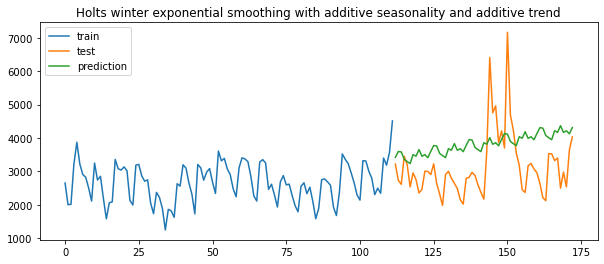

In [333]:
plt.title('Holts winter exponential smoothing with additive seasonality and additive trend')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_hwe_as_at.plot(legend = True, label = 'prediction')

In [293]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
model_hwe_ms_at = ExponentialSmoothing(train["Daily_Visitors"],seasonal = "mul",trend = "add",seasonal_periods = 12).fit()
preds_hwe_ms_at = model_hwe_ms_at.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_multi_sea_add_trend = RMSE(test.Daily_Visitors, preds_hwe_ms_at)
rmse_hwe_multi_sea_add_trend

947.1786868226519

<AxesSubplot:title={'center':'Holts winter exponential smoothing with multiplicative seasonality and additive trend'}>

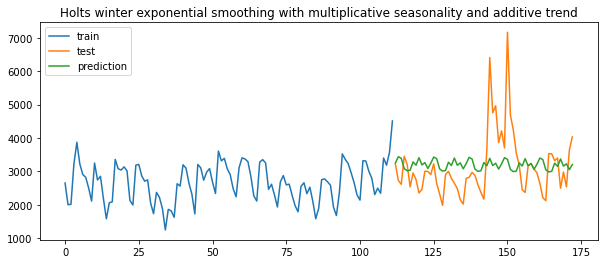

In [334]:
plt.title('Holts winter exponential smoothing with multiplicative seasonality and additive trend')
train['Daily_Visitors'].plot(legend = True, label = 'train', figsize = (10,4))
test['Daily_Visitors'].plot(legend = True, label = 'test')
preds_hwe_ms_at.plot(legend = True, label = 'prediction')

In [462]:
list = [['Linear', rmse_linear], ['Exponential', rmse_exp], ['Quadratic', rmse_quad], ['Additive Seasonality', rmse_add_sea], 
        ['Additive Seasonality Quadratic', rmse_add_sea_quad], ['Multiplicative Seasonality', rmse_multi_sea], 
        ['Multiplicative Additive Seasonality', rmse_multi_add_sea],['ARMA', rmse_preds_arma], ['ARIMA', rmse_preds_arima],
        ['SARIMAX', sar_rmse], ['Holt', rmse_holt],
        ['Holt Winters Exp Additive Seasonality and Trend', rmse_hwe_add_sea_add_trend], 
        ['Holt Winters Exp Multi Seasonality and Additive Trend', rmse_hwe_multi_sea_add_trend]]

In [463]:
dataset = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
dataset

,Model,RMSE_Value
0,Linear,992.065802
1,Exponential,1013.569103
2,Quadratic,964.806255
3,Additive Seasonality,1342.298504
4,Additive Seasonality Quadratic,1011.613801
5,Multiplicative Seasonality,2590.764233
6,Multiplicative Additive Seasonality,2465.548159
7,ARMA,925.234079
8,ARIMA,860.924796
9,SARIMAX,925.234079


## Final Model Building with ARIMA

C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shashank\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available


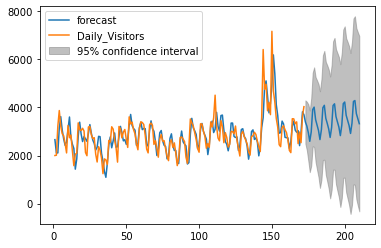

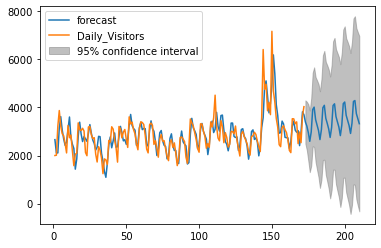

In [81]:
final_model = ARIMA(data1['Daily_Visitors'],order=(7,1,5)).fit()
forecast = final_model.forecast(steps = 30)[0]
final_model.plot_predict(1,210)

In [82]:
a=final_model.forecast(10)[0]

In [83]:
df = pd.DataFrame(a, columns = ['pred'])
df

,pred
0,3391.920683
1,3225.305904
2,2954.341649
3,2590.011598
4,2980.824226
5,3910.334558
6,4012.161784
7,3495.769832
8,3266.535033
9,3038.364648


In [86]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("forecast.pkl","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()